<a href="https://colab.research.google.com/github/chibuzorc/data_analysis/blob/main/RegressionClassification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [29]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn import set_config
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

The data is loaded on Google Drive, similarly to the previous task

In [4]:
# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
# Load the data into a Pandas DataFrame
data = pd.read_csv('/content/drive/MyDrive/IT7103/Assignment 2/stroke.csv')

In [6]:
# Show data information and the first few columns
print(data.info())
print(data.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB
None
      id  gender   age  hypertension  heart_disease ever_married  \
0   9046    Male  67.0             0              1          Yes   
1  51676  Female

The dataset contains information about different patients, which includes different columns such as gender, age, demographic information, some health-related data, and whether they have had a stroke, which is the target variable. The target variable indicates whether a patient has had a stroke before (1) or whether they have not (0). It includes 12 different columns of varying data types (int, object, float) and does not contain null-values, hence handling of null values would not be required in this assignment.

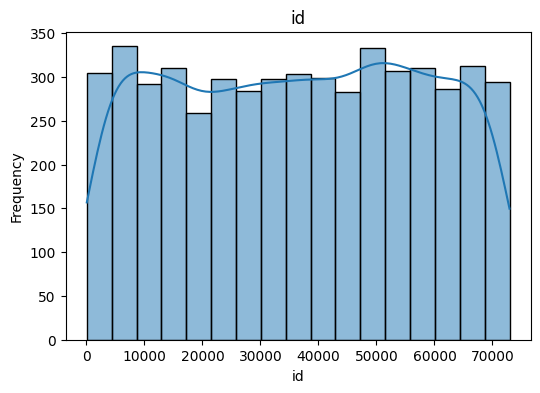

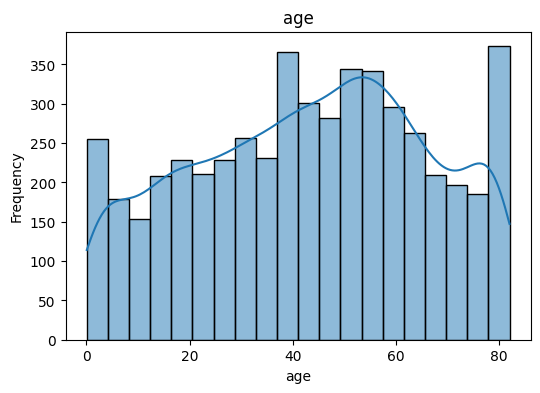

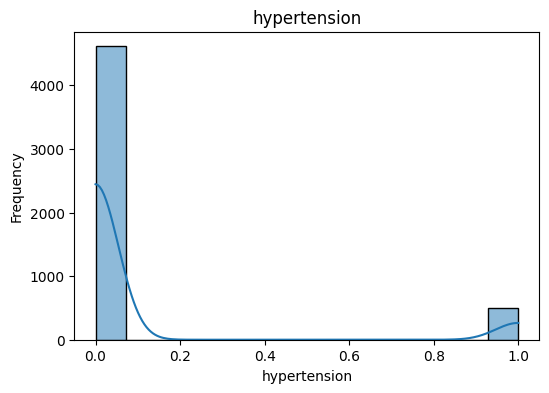

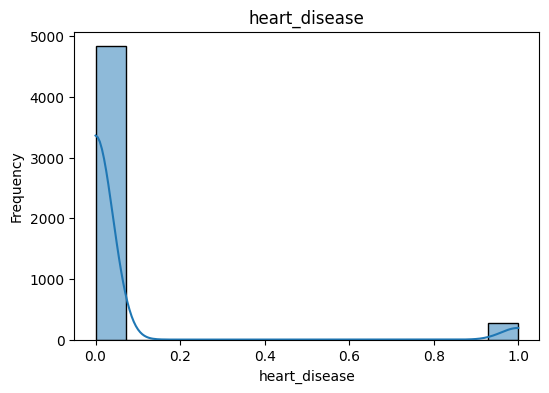

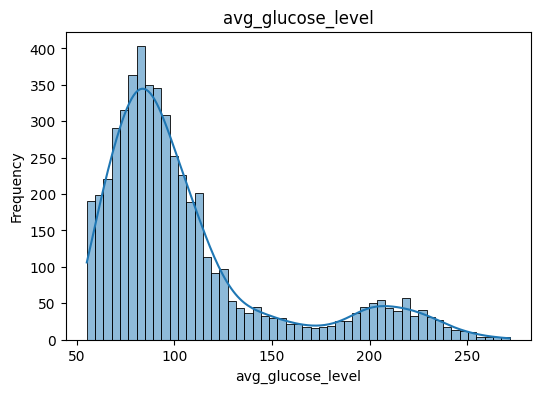

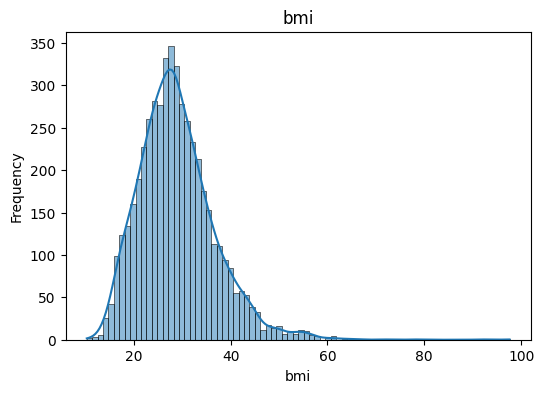

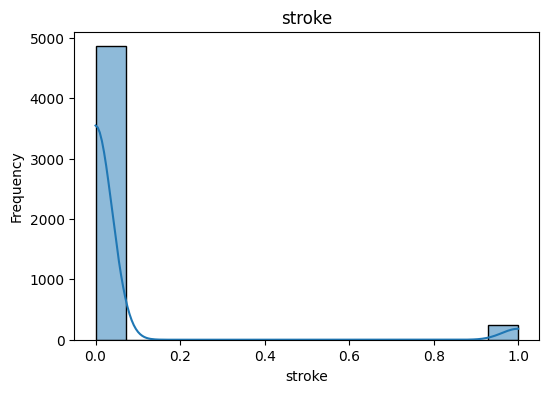

In [11]:
# Visualize necessary columns and categorize them
numeric_cols = data.select_dtypes(include=['int64', 'float64']).columns

# Loop through each numeric column and create a histogram plot
for col in numeric_cols:
    plt.figure(figsize=(6, 4))  # Set size for each individual plot
    sns.histplot(data[col], kde=True)  # Plot histogram with KDE
    plt.title(col)
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()

In [12]:
# Examine the target variable
print(data['stroke'].value_counts()) # Display the count of each class
print(data['stroke'].dtype) # Display the data type of the target variable
print(data['stroke'].unique()) # Display the unique values in the target variable

stroke
0    4861
1     249
Name: count, dtype: int64
int64
[1 0]


In [13]:
# Define categorical and numerical columns
categorical_features = ['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status']
numerical_features = ['age', 'hypertension', 'heart_disease', 'avg_glucose_level', 'bmi']


In [14]:
# Preprocessing for numerical data: impute missing values and scale
numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

In [15]:
# Preprocessing for categorical data: one-hot encode
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

In [16]:
# Combine preprocessing steps
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ])

In [27]:
# Create the full pipeline
pipeline = Pipeline(steps=[('preprocessor', preprocessor)])


In [33]:
# Show pipeline
set_config(display='text')
print("\nPreprocessing Pipeline:")
print(pipeline)


Preprocessing Pipeline:
Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['age', 'hypertension',
                                                   'heart_disease',
                                                   'avg_glucose_level',
                                                   'bmi']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                      

In [18]:
# Separate target and features
X = data.drop(columns=['id', 'stroke']) # Drop ID and target columns
y = data['stroke']   # Target column

In [19]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [20]:
# Apply preprocessing to the data
X_train_preprocessed = preprocessor.fit_transform(X_train)  # Fit and transform the training data
X_test_preprocessed = preprocessor.transform(X_test)        # Transform the testing data

In [21]:
# Initialize the models
log_reg = LogisticRegression(random_state=42)
random_forest = RandomForestClassifier(random_state=42)
svm = SVC(random_state=42)

In [22]:
# Train the models
log_reg.fit(X_train_preprocessed, y_train)
random_forest.fit(X_train_preprocessed, y_train)
svm.fit(X_train_preprocessed, y_train)


SVC(random_state=42)

In [23]:
# Make predictions
y_pred_log_reg = log_reg.predict(X_test_preprocessed)
y_pred_random_forest = random_forest.predict(X_test_preprocessed)
y_pred_svm = svm.predict(X_test_preprocessed)

In [24]:
# Evaluate the models
def evaluate_model(y_true, y_pred):
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred, zero_division=1)
    recall = recall_score(y_true, y_pred, zero_division=1)
    f1 = f1_score(y_true, y_pred, zero_division=1)
    return accuracy, precision, recall, f1

In [25]:
log_reg_metrics = evaluate_model(y_test, y_pred_log_reg)
random_forest_metrics = evaluate_model(y_test, y_pred_random_forest)
svm_metrics = evaluate_model(y_test, y_pred_svm)

In [26]:
print("Logistic Regression Metrics: ", log_reg_metrics)
print("Random Forest Metrics: ", random_forest_metrics)
print("SVM Metrics: ", svm_metrics)

Logistic Regression Metrics:  (0.9393346379647749, 1.0, 0.0, 0.0)
Random Forest Metrics:  (0.9383561643835616, 0.0, 0.0, 0.0)
SVM Metrics:  (0.9393346379647749, 1.0, 0.0, 0.0)


All three models(Logistic Regression, Random Forest, and SVM) show high precision values, meaning they predict stroke accuractely approximately 94% of the time.

The recall values are 1.0 for SVM and Logistic Regression, indicating correct identification of stroke cases in test case. This could be misleading considering other metrics.

Random forest recall 0.0 shows it did not identify stroke cases in test set.

The F1 scores for all are 0.0, indicating imbalance in the dataset.

These results show that it is challenging dealing with datasets that may be imbalanced. The high precision and recall values may be misleading and the 0 scores in some other model scores indicate that there may be imbalance.

